In [ ]:
'''''steps to clean the data
1. Drop the unwanted column. (Only drop those drop which you are sure not gone use or determine the output )
2. Find the 'null' values and Visulise the null value data on heat map.
3. Drop the unwanted column where we do not enough data to claculate the mean.
4. Fill up the mean (if possible conditional mean) for the NA values in columns where we have enough values/data to calculate the mean.
5. Convert the catagory non-nmerical  data column into numerical data colmun.
'''''

In [3]:
import numpy as np
import pandas as pd

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("titanic_train.csv")

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:

df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [8]:
df.isnull()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False
5,False,False,False,True,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,True,False


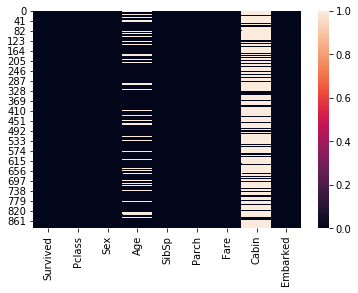

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.drop('Cabin', axis=1, inplace=True)

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


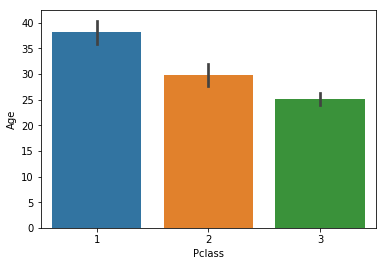

In [11]:
sns.barplot(x = 'Pclass', y='Age' , data =df)

In [12]:
df.groupby('Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [13]:
def impute_age (var):
    a = var[0]
    b = var[1]
    
    if pd.isnull(b):
        if a == 1:
            return 38
        elif a== 2:
            return 30
        else:
            return 25
    else:
        return b
    

In [14]:
df['Age'] = df[['Pclass','Age']].apply(impute_age, axis=1)

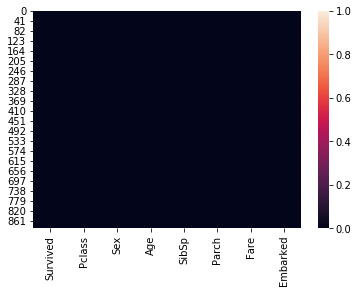

In [15]:
sns.heatmap(df.isnull())

In [16]:
sex = pd.get_dummies(df['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [17]:
embarked = pd.get_dummies(df['Embarked'],drop_first=True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [18]:
df = pd.concat([df,embarked,sex], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Q,S,male
0,0,3,male,22.0,1,0,7.2500,S,0,1,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,1,0
3,1,1,female,35.0,1,0,53.1000,S,0,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,1,1


In [19]:
df.drop(['Sex','Embarked'],axis=1, inplace=True)

In [20]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,0,3,22.0,1,0,7.2500,0,1,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,1,0
3,1,1,35.0,1,0,53.1000,0,1,0
4,0,3,35.0,0,0,8.0500,0,1,1


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
ss = StandardScaler()

In [23]:
scale_array = ss.fit_transform(df.drop('Survived', axis=1))


In [24]:
X = pd.DataFrame(data =scale_array, index=df.index,columns=df.columns[:-1] )
Y = df['Survived']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3)

In [27]:
x_train.shape

(623, 8)

In [28]:
x_test.shape

(268, 8)

In [29]:
y_train.shape

(623,)

In [30]:
y_test.shape

(268,)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lr = LogisticRegression()

In [33]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
y_predict = lr.predict(x_test)

In [36]:
y_predict

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0], dtype=int64)

In [41]:
from sklearn.metrics import confusion_matrix

In [43]:
cm = confusion_matrix(y_test,y_predict)

In [44]:
cm

array([[145,  28],
       [ 29,  66]], dtype=int64)

In [46]:
(145+66)/268

0.7873134328358209